In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', index_col=0)

In [3]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Estadísticas Descriptivas
- La **media** nos da un valor promedio.
- La **mediana** muestra el valor central, útil si hay valores extremos.
- La **moda** es el valor que aparece más frecuentemente.
- La **desviación estándar** mide la dispersión de los datos.
- El **rango muestra** la diferencia entre el valor más alto y el más bajo.

In [4]:
# Selección de columnas numéricas
numerical_columns = ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Calcular media
mean_values = df[numerical_columns].mean()

# Calcular mediana
median_values = df[numerical_columns].median()

# Calcular moda
mode_values = df[numerical_columns].mode().iloc[0]  # mode() devuelve un DataFrame

# Calcular desviación estándar
std_dev_values = df[numerical_columns].std()

# Calcular rango
range_values = df[numerical_columns].max() - df[numerical_columns].min()

# Calcular percentiles (25%, 50%, 75%)
percentiles = df[numerical_columns].quantile([0.25, 0.5, 0.75])

# Mostrar resultados
print("Media:\n", mean_values)
print("\nMediana:\n", median_values)
print("\nModa:\n", mode_values)
print("\nDesviación Estándar:\n", std_dev_values)
print("\nRango:\n", range_values)
print("\nPercentiles (25%, 50%, 75%):\n", percentiles)


Media:
 Sleep Duration                7.132086
Physical Activity Level      59.171123
Stress Level                  5.385027
Heart Rate                   70.165775
Daily Steps                6816.844920
dtype: float64

Mediana:
 Sleep Duration                7.2
Physical Activity Level      60.0
Stress Level                  5.0
Heart Rate                   70.0
Daily Steps                7000.0
dtype: float64

Moda:
 Sleep Duration                7.2
Physical Activity Level      60.0
Stress Level                  3.0
Heart Rate                   68.0
Daily Steps                8000.0
Name: 0, dtype: float64

Desviación Estándar:
 Sleep Duration                0.795657
Physical Activity Level      20.830804
Stress Level                  1.774526
Heart Rate                    4.135676
Daily Steps                1617.915679
dtype: float64

Rango:
 Sleep Duration                2.7
Physical Activity Level      60.0
Stress Level                  5.0
Heart Rate                   21.0
Daily 

### Valores atípicos
Se identifican los valores atípicos en las variables numéricas utilizando el método del rango intercuartílico (IQR).

In [5]:
# Calcular IQR para identificar valores atípicos
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Mostrar los valores atípicos
print("Outliers detectados:\n", df[outliers.any(axis=1)])


Outliers detectados:
            Gender  Age            Occupation  Sleep Duration  \
Person ID                                                      
4            Male   28  Sales Representative             5.9   
5            Male   28  Sales Representative             5.9   
6            Male   28     Software Engineer             5.9   
7            Male   29               Teacher             6.3   
17         Female   29                 Nurse             6.5   
19         Female   29                 Nurse             6.5   
81         Female   34             Scientist             5.8   
82         Female   34             Scientist             5.8   
94           Male   35                Lawyer             7.4   
146        Female   38                Lawyer             7.4   
148          Male   39              Engineer             6.5   
265          Male   48                Doctor             7.3   
267          Male   48                Doctor             7.3   
277          Male 

### Resumen

In [6]:
summary_table = pd.DataFrame({
    'Media': mean_values,
    'Mediana': median_values,
    'Moda': mode_values,
    'Desviación Estándar': std_dev_values,
    'Rango': range_values
})

# Agregar los percentiles a la tabla
summary_table['25%'] = percentiles.loc[0.25].values
summary_table['50%'] = percentiles.loc[0.5].values
summary_table['75%'] = percentiles.loc[0.75].values

print("Tabla Resumen:\n", summary_table)


Tabla Resumen:
                                Media  Mediana    Moda  Desviación Estándar  \
Sleep Duration              7.132086      7.2     7.2             0.795657   
Physical Activity Level    59.171123     60.0    60.0            20.830804   
Stress Level                5.385027      5.0     3.0             1.774526   
Heart Rate                 70.165775     70.0    68.0             4.135676   
Daily Steps              6816.844920   7000.0  8000.0          1617.915679   

                          Rango     25%     50%     75%  
Sleep Duration              2.7     6.4     7.2     7.8  
Physical Activity Level    60.0    45.0    60.0    75.0  
Stress Level                5.0     4.0     5.0     7.0  
Heart Rate                 21.0    68.0    70.0    72.0  
Daily Steps              7000.0  5600.0  7000.0  8000.0  


### Histogramas para cada columna numérica
Esta sección muestra la distribución de las variables numéricas.

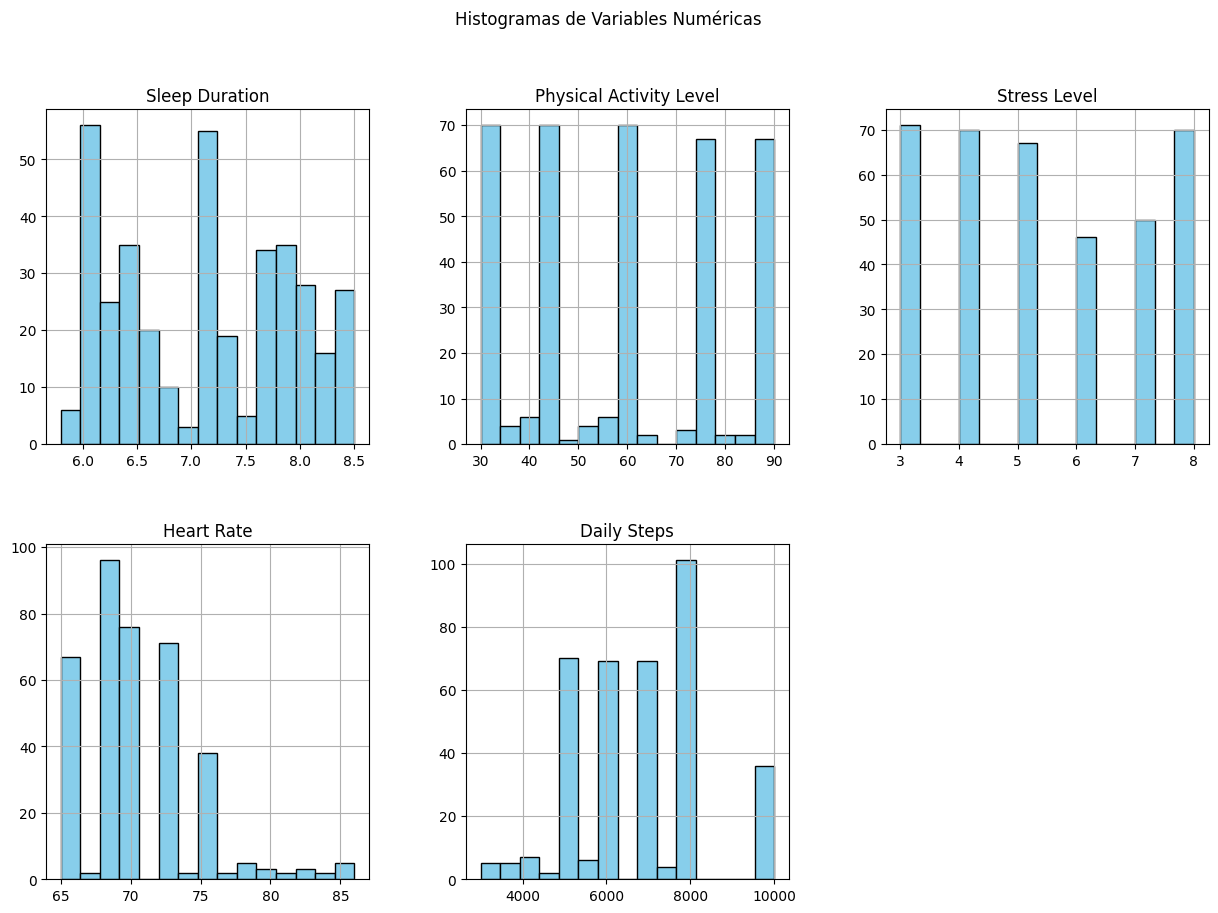

In [7]:
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3), color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()


### Boxplot para identificar los datos atípicos
Estos gráficos ayudan a visualizar los valores atípicos identificados previamente.

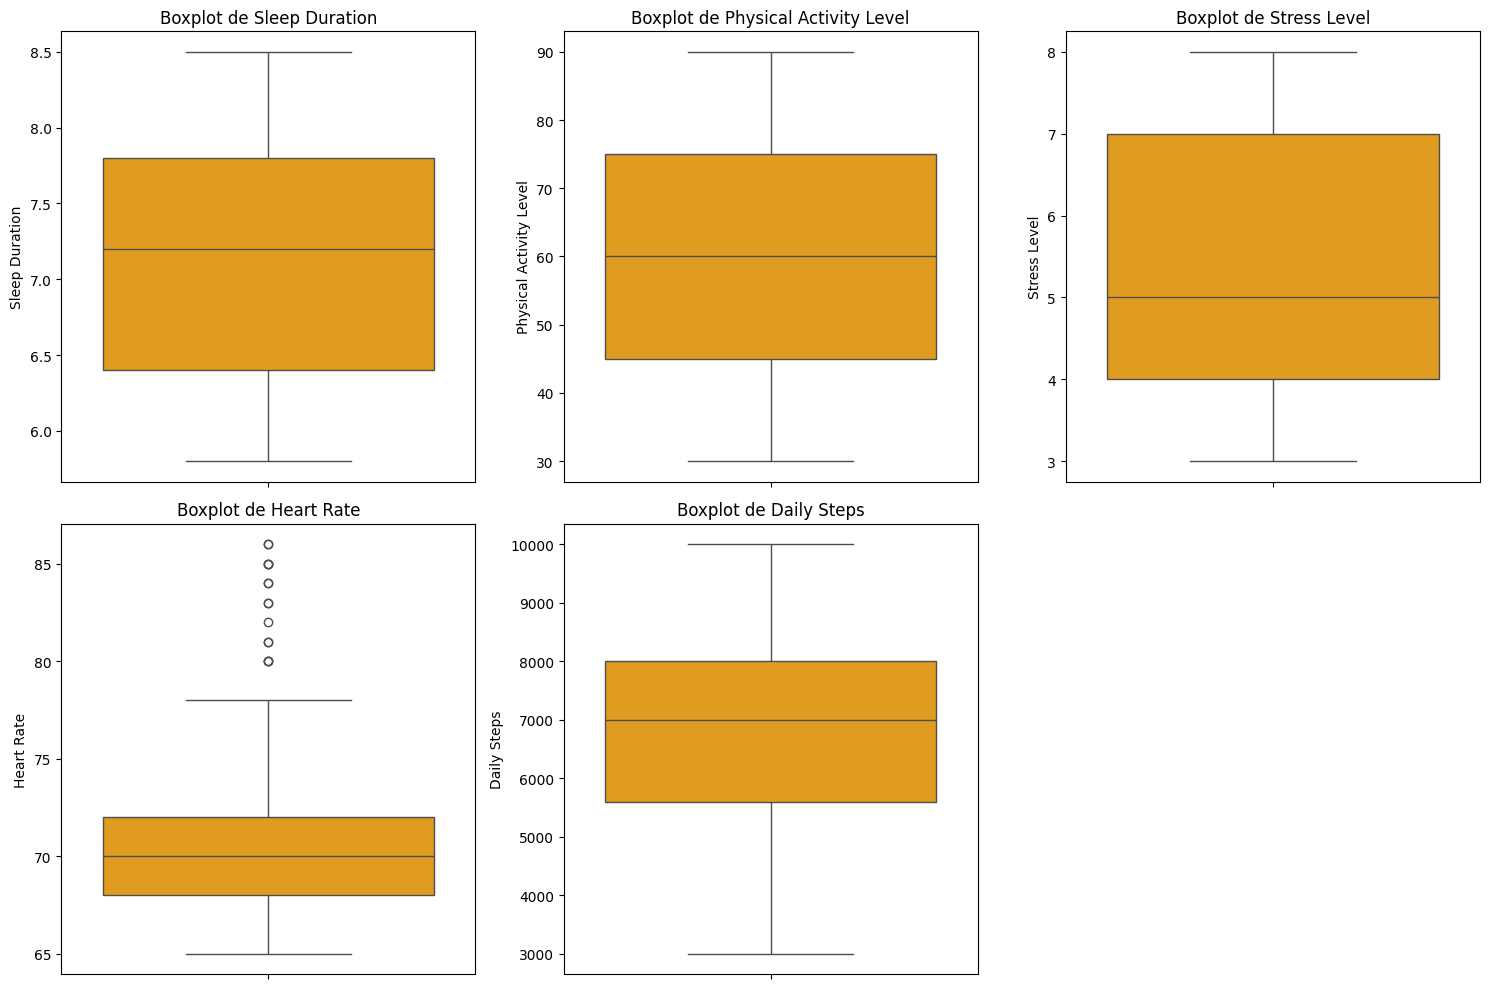

In [8]:
# Crear boxplots para cada columna numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=col, data=df, color='orange')
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


### Gráfico de barras para variables categóricas
Estos gráficos muestran cómo se distribuyen las categorías de Occupation y Sleep Disorder.

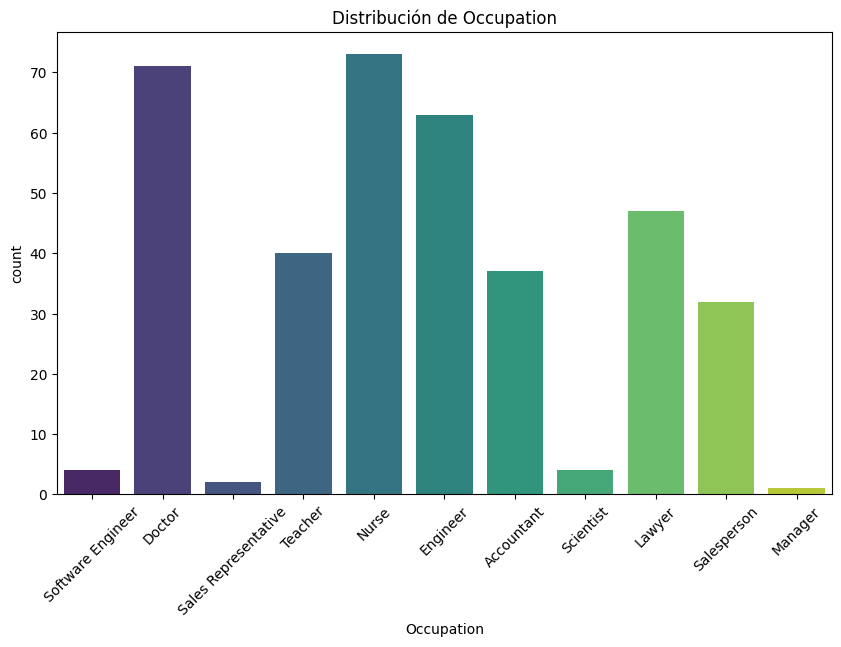

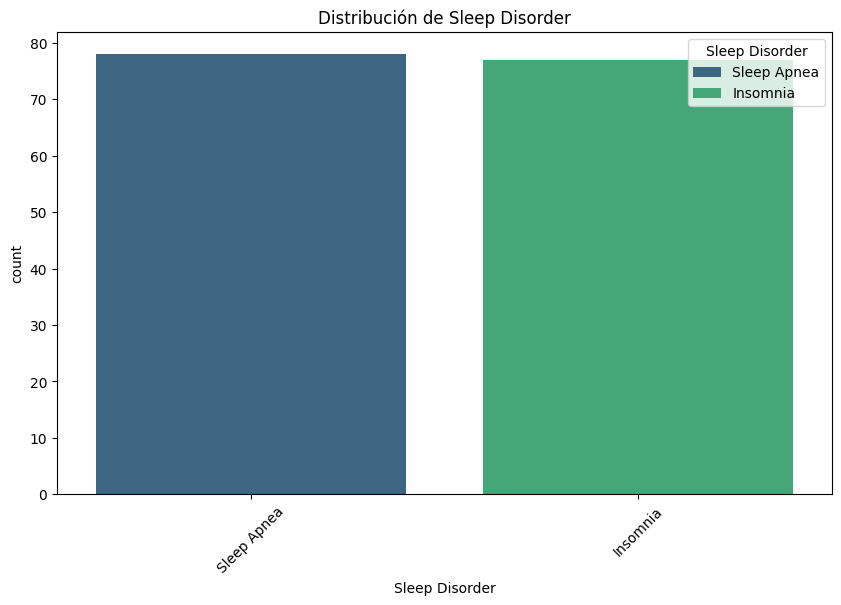

In [9]:
# Gráfico de barras para la variable 'Occupation'
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=df, hue='Occupation', palette='viridis')
plt.title('Distribución de Occupation')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para la variable 'Sleep Disorder'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep Disorder', data=df, hue='Sleep Disorder', palette='viridis')
plt.title('Distribución de Sleep Disorder')
plt.xticks(rotation=45)
plt.show()



### Relaciones entre variables

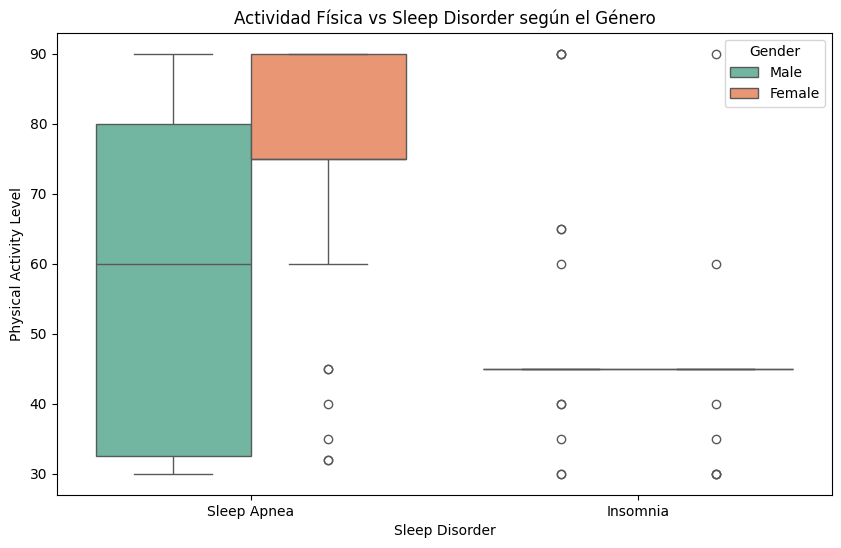

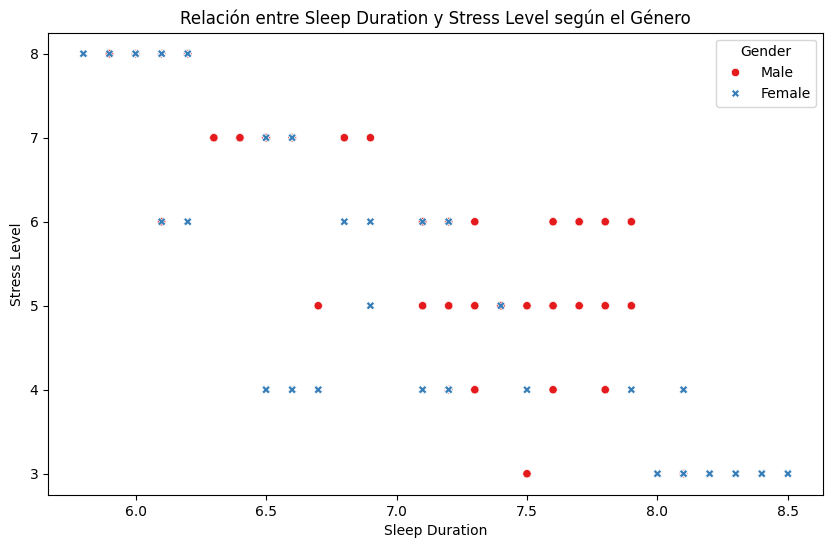

In [10]:
# Relación entre Physical Activity Level y Sleep Disorder con hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', hue='Gender', data=df, palette='Set2')
plt.title('Actividad Física vs Sleep Disorder según el Género')
plt.show()

# Relación entre Sleep Duration y Stress Level con hue para Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Stress Level', hue='Gender', style='Gender', data=df, palette='Set1')
plt.title('Relación entre Sleep Duration y Stress Level según el Género')
plt.show()



### Gráfica de Correlaciones
El mapa de calor ayuda a identificar relaciones entre las variables numéricas. Los valores varían de 1 (correlación positiva perfecta) a -1 (correlación negativa perfecta). Valores cercanos a 0 indican una débil o nula correlación.

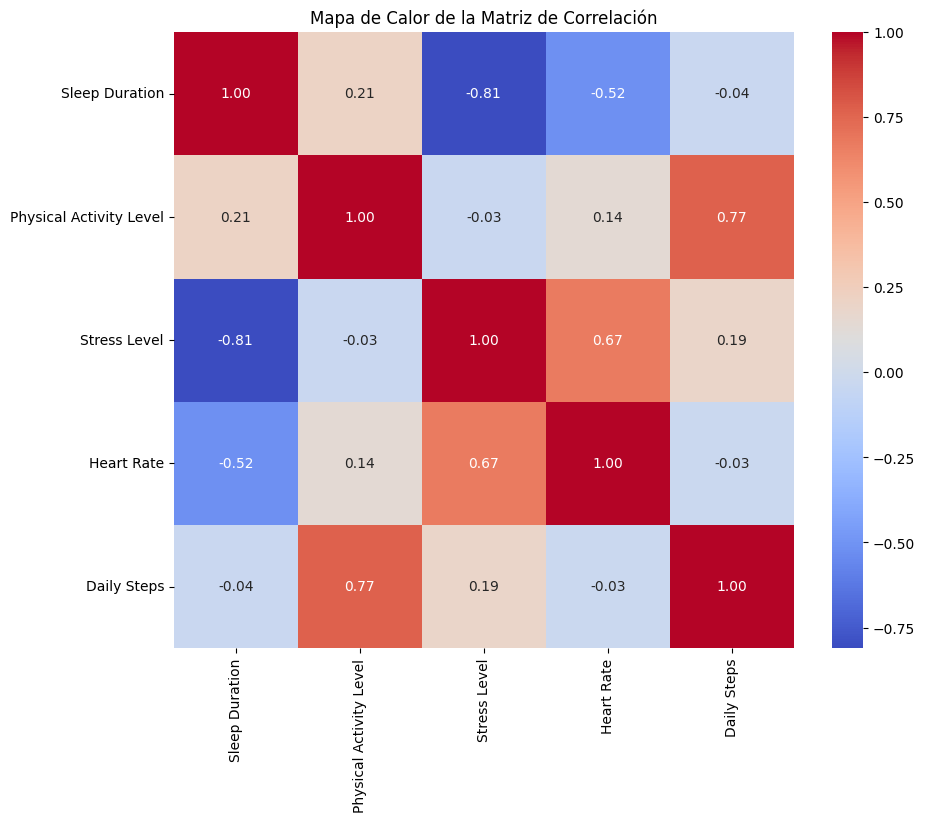

In [11]:
# Calcular la matriz de correlación
correlation_matrix = df[numerical_columns].corr()

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


### Graficar la distribución de las variables categóricas con violinplots
**Sleep Duration por BMI Category**: Este gráfico muestra la distribución de la duración del sueño segmentada por las categorías de IMC (Bajo Peso, Peso Normal, Sobrepeso, Obesidad). Permite observar las diferencias en la distribución de la duración del sueño entre las diferentes categorías de IMC.

**Physical Activity Level por BMI Category**: Similar al anterior, pero muestra cómo varía el nivel de actividad física según las diferentes categorías de IMC.

**Heart Rate por Gender**: Este gráfico ilustra las diferencias en la distribución de la frecuencia cardíaca entre géneros.

**Stress Level por Sleep Disorder**: Muestra cómo se distribuyen los niveles de estrés en personas con o sin trastornos del sueño.

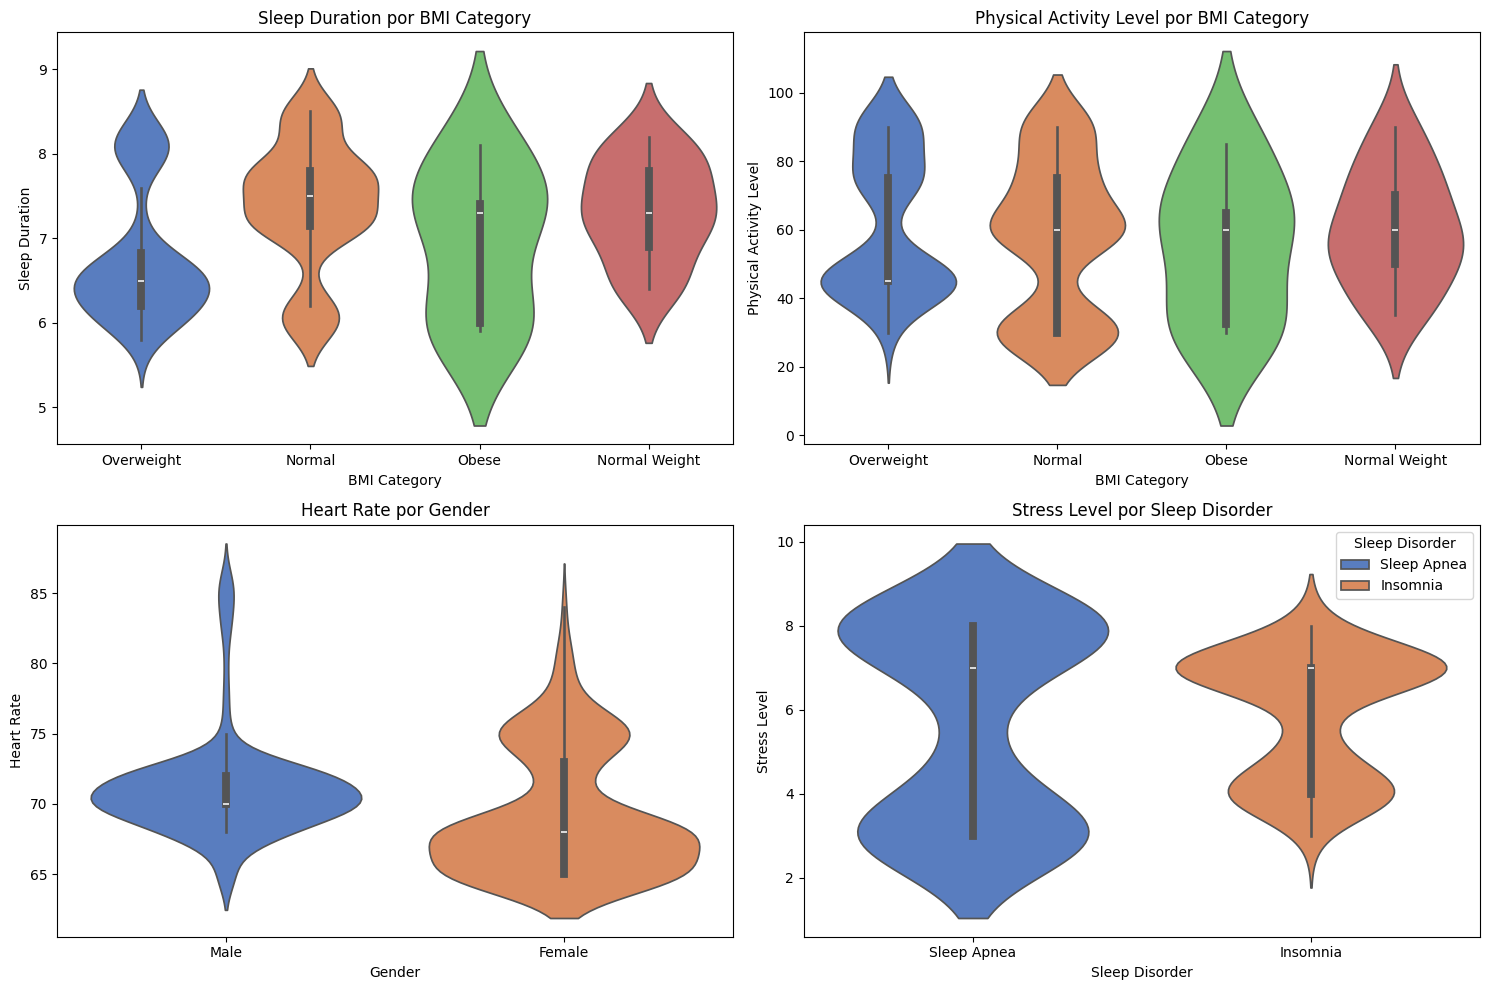

In [12]:
# Violinplots para explorar variables numéricas segmentadas por variables categóricas
plt.figure(figsize=(15, 10))

# Violinplot para 'Sleep Duration' segmentado por 'BMI Category'
plt.subplot(2, 2, 1)
sns.violinplot(x='BMI Category', y='Sleep Duration', data=df, hue='BMI Category', palette='muted')
plt.title('Sleep Duration por BMI Category')

# Violinplot para 'Physical Activity Level' segmentado por 'BMI Category'
plt.subplot(2, 2, 2)
sns.violinplot(x='BMI Category', y='Physical Activity Level', data=df, hue='BMI Category', palette='muted')
plt.title('Physical Activity Level por BMI Category')

# Violinplot para 'Heart Rate' segmentado por 'Gender'
plt.subplot(2, 2, 3)
sns.violinplot(x='Gender', y='Heart Rate', data=df, hue='Gender', palette='muted')
plt.title('Heart Rate por Gender')

# Violinplot para 'Stress Level' segmentado por 'Sleep Disorder'
plt.subplot(2, 2, 4)
sns.violinplot(x='Sleep Disorder', y='Stress Level', data=df, hue='Sleep Disorder', palette='muted')
plt.title('Stress Level por Sleep Disorder')

plt.tight_layout()
plt.show()


### Modelo de regresión lineal simple
X representa el nivel de estrés, mientras que y es la duración del sueño.
Se entrenó un modelo de regresión lineal simple.
Mean Squared Error (MSE): Mide la magnitud promedio de los errores en las predicciones del modelo.
R^2 Score: Indica el porcentaje de la varianza en la variable dependiente que es explicada por la variable independiente. Valores cercanos a 1 indican un buen ajuste del modelo.

Mean Squared Error: 0.19262781765833684
R^2 Score: 0.7106694132038407


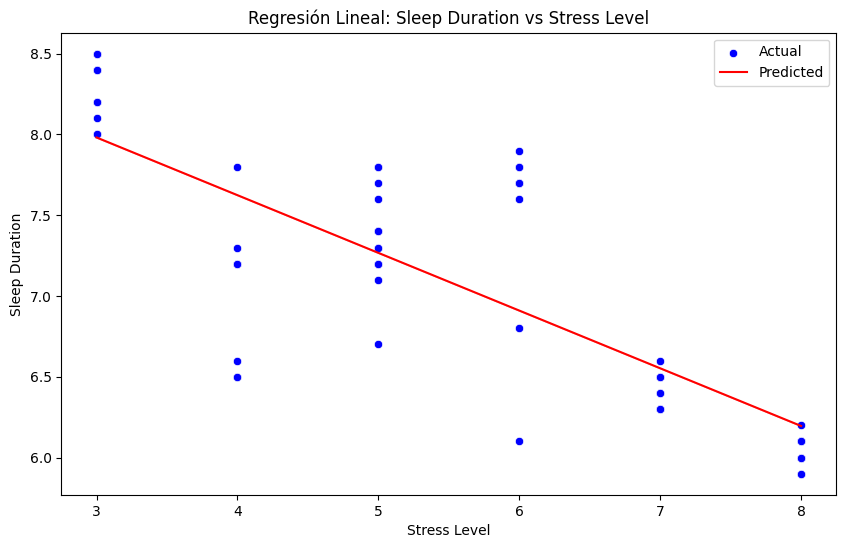

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las características y la variable objetivo
X = df[['Stress Level']]
y = df['Sleep Duration']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Graficar la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Stress Level'], y=y_test, label='Actual', color='blue')
sns.lineplot(x=X_test['Stress Level'], y=y_pred, label='Predicted', color='red')
plt.title('Regresión Lineal: Sleep Duration vs Stress Level')
plt.show()


### Relación entre variables categoricas y numéricas
Boxplot para explorar la relación entre 'Occupation' y 'Sleep Duration'

**Distribución por Occupation:** Cada caja representa la distribución de la duración del sueño para diferentes ocupaciones, mostrando la mediana y el rango intercuartílico.

**Valores Atípicos**: Los puntos fuera de las cajas indican posibles valores atípicos en la duración del sueño para ciertas ocupaciones.

Boxplot para explorar la relación entre 'Sleep Disorder' y 'Heart Rate'

**Distribución por Sleep Disorder**: Aquí se muestra cómo varía la frecuencia cardíaca entre personas con y sin trastornos del sueño.

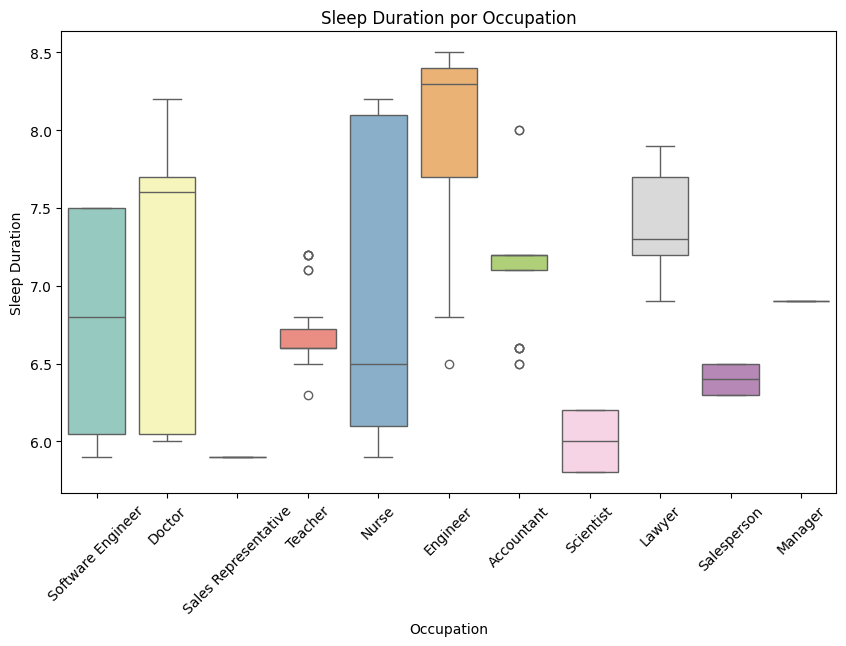

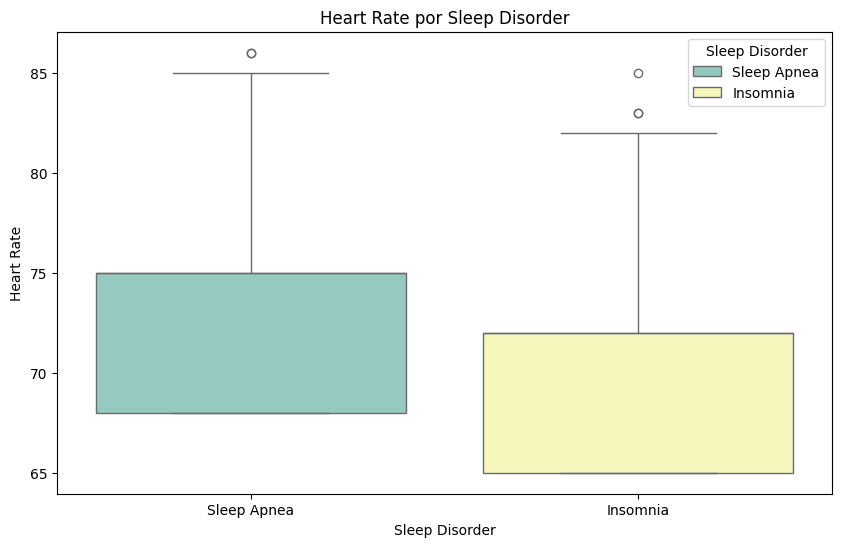

In [14]:
# Boxplot para explorar la relación entre 'Occupation' y 'Sleep Duration'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df, hue='Occupation', palette='Set3')
plt.title('Sleep Duration por Occupation')
plt.xticks(rotation=45)
plt.show()

# Boxplot para explorar la relación entre 'Sleep Disorder' y 'Heart Rate'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df, hue='Sleep Disorder', palette='Set3')
plt.title('Heart Rate por Sleep Disorder')
plt.show()


### Visualizar con Pairplot
**Relaciones entre Variables**: El pairplot genera gráficos de dispersión (scatter plots) para cada par de variables numéricas seleccionadas (en este caso, numerical_columns), lo que permite observar las posibles relaciones lineales o no lineales entre ellas.

**Distribución por Sleep Disorder**: Los puntos en el gráfico están coloreados según la variable Sleep Disorder, lo que facilita la comparación de patrones entre personas con y sin trastornos del sueño.

**Distribución Univariada**: En la diagonal del pairplot, se muestran los histogramas o gráficos de densidad para cada variable, lo que proporciona información sobre su distribución individual.

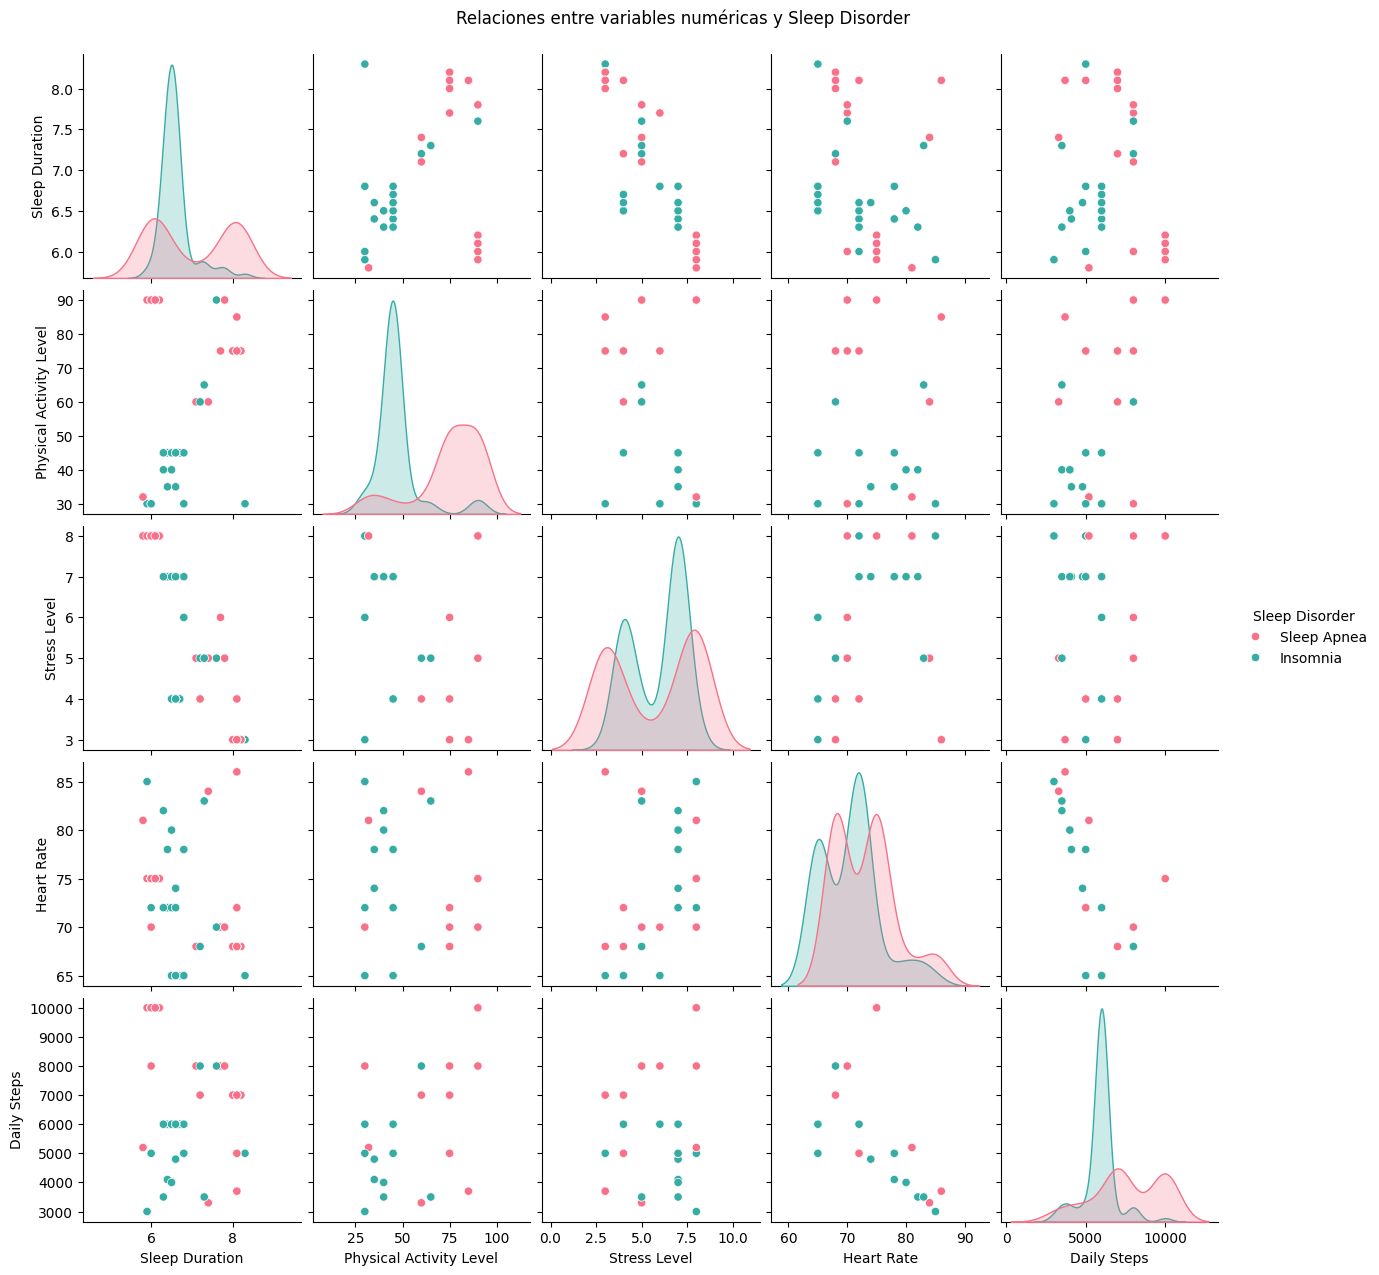

In [15]:
sns.pairplot(df, hue='Sleep Disorder', vars=numerical_columns, palette='husl')
plt.suptitle('Relaciones entre variables numéricas y Sleep Disorder', y=1.02)
plt.show()
